In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
import netCDF4 as nc
from netCDF4 import Dataset
import geopandas as gpd
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from pyproj import CRS, Transformer
import xarray as xr
from sklearn.decomposition import PCA

In [3]:
#Importing bottom features 

EMOD_features_filepath = "/cluster/projects/itk-SINMOD/coral-mapping/data/processed_data/features/ready-for-training/EMOD_features.nc"
EMOD_features = xr.open_dataset(EMOD_features_filepath)

SINMOD_bottom_features_filepath = "/cluster/projects/itk-SINMOD/coral-mapping/data/processed_data/features/ready-for-training/SINMOD_bottom_features.nc"
SINMOD_bottom_features = xr.open_dataset(SINMOD_bottom_features_filepath)

In [54]:
mean = SINMOD_bottom_features.sel(stat='mean')
minimum = SINMOD_bottom_features.sel(stat='10th_percentile')
maximum = SINMOD_bottom_features.sel(stat='90th_percentile')

mean_data_df = mean.to_dataframe().reset_index()
min_data_df = minimum.to_dataframe().reset_index()
max_data_df = maximum.to_dataframe().reset_index()

mean_data_df = mean_data_df.rename(columns={col: f"{col}_mean" for col in mean_data_df.columns if col not in ['x', 'y']})
min_data_df = min_data_df.rename(columns={col: f"{col}_10th_percentile" for col in min_data_df.columns if col not in ['x', 'y']})
max_data_df = max_data_df.rename(columns={col: f"{col}_90th_percentile" for col in max_data_df.columns if col not in ['x', 'y']})

In [55]:
env_data_df = SINMOD_bottom_features[['x', 'y', 'bottom_temperature_features', 'bottom_salinity_features',
                                  'bottom_current_features', 'bottom_statistical_northness_features',
                                  'bottom_statistical_eastness_features', 'current_aspect_angle']].to_dataframe().reset_index()

print(env_data_df.shape)

(241533225, 9)


In [56]:
#print(mean_data_df.columns)
#mean_data_df = mean_data_df.drop(['stat_mean', 'spatial_ref_mean', 'bottom_statistical_northness_features_mean','bottom_statistical_eastness_features_mean', current_aspect_angle_mean], axis=1)
print(mean_data_df.columns)
mean_data_df = mean_data_df.drop(['current_aspect_angle_mean'], axis=1)
print(mean_data_df.columns)

Index(['x', 'y', 'stat_mean', 'spatial_ref_mean',
       'bottom_temperature_features_mean', 'bottom_salinity_features_mean',
       'bottom_current_features_mean',
       'bottom_statistical_northness_features_mean',
       'bottom_statistical_eastness_features_mean',
       'current_aspect_angle_mean'],
      dtype='object')
Index(['x', 'y', 'stat_mean', 'spatial_ref_mean',
       'bottom_temperature_features_mean', 'bottom_salinity_features_mean',
       'bottom_current_features_mean',
       'bottom_statistical_northness_features_mean',
       'bottom_statistical_eastness_features_mean'],
      dtype='object')


In [57]:
print(min_data_df.columns)
min_data_df = min_data_df.drop(['stat_10th_percentile', 'spatial_ref_10th_percentile', 'bottom_statistical_northness_features_10th_percentile', 'bottom_statistical_eastness_features_10th_percentile', 'current_aspect_angle_10th_percentile' ], axis=1)
print(min_data_df.columns)

Index(['x', 'y', 'stat_10th_percentile', 'spatial_ref_10th_percentile',
       'bottom_temperature_features_10th_percentile',
       'bottom_salinity_features_10th_percentile',
       'bottom_current_features_10th_percentile',
       'bottom_statistical_northness_features_10th_percentile',
       'bottom_statistical_eastness_features_10th_percentile',
       'current_aspect_angle_10th_percentile'],
      dtype='object')
Index(['x', 'y', 'bottom_temperature_features_10th_percentile',
       'bottom_salinity_features_10th_percentile',
       'bottom_current_features_10th_percentile'],
      dtype='object')


In [58]:
print(max_data_df.columns)
max_data_df = max_data_df.drop(['stat_90th_percentile', 'spatial_ref_90th_percentile','bottom_statistical_northness_features_90th_percentile', 'bottom_statistical_eastness_features_90th_percentile','current_aspect_angle_90th_percentile'  ], axis=1)

Index(['x', 'y', 'stat_90th_percentile', 'spatial_ref_90th_percentile',
       'bottom_temperature_features_90th_percentile',
       'bottom_salinity_features_90th_percentile',
       'bottom_current_features_90th_percentile',
       'bottom_statistical_northness_features_90th_percentile',
       'bottom_statistical_eastness_features_90th_percentile',
       'current_aspect_angle_90th_percentile'],
      dtype='object')


In [59]:
print(max_data_df.columns)

Index(['x', 'y', 'bottom_temperature_features_90th_percentile',
       'bottom_salinity_features_90th_percentile',
       'bottom_current_features_90th_percentile'],
      dtype='object')


In [60]:
#Scaling the data

scaler = StandardScaler()
features_to_scale_mean_data = [
    'bottom_temperature_features_mean',
    'bottom_salinity_features_mean',
    'bottom_current_features_mean'
]
scaled_mean_data = scaler.fit_transform(mean_data_df[features_to_scale_mean_data])
mean_data_df[features_to_scale_mean_data] = scaled_mean_data

print(mean_data_df.head())


              x             y stat_mean  spatial_ref_mean  \
0 -65456.088686  7.539188e+06      mean                 0   
1 -65456.088686  7.539097e+06      mean                 0   
2 -65456.088686  7.539006e+06      mean                 0   
3 -65456.088686  7.538915e+06      mean                 0   
4 -65456.088686  7.538824e+06      mean                 0   

   bottom_temperature_features_mean  bottom_salinity_features_mean  \
0                               NaN                            NaN   
1                               NaN                            NaN   
2                               NaN                            NaN   
3                               NaN                            NaN   
4                               NaN                            NaN   

   bottom_current_features_mean  bottom_statistical_northness_features_mean  \
0                           NaN                                         NaN   
1                           NaN                       

In [61]:
scaler = StandardScaler()
features_to_scale_min_data = [
    'bottom_temperature_features_10th_percentile',
    'bottom_salinity_features_10th_percentile',
    'bottom_current_features_10th_percentile'
]
scaled_min_data = scaler.fit_transform(min_data_df[features_to_scale_min_data])
min_data_df[features_to_scale_min_data] = scaled_min_data

print(min_data_df.head())

              x             y  bottom_temperature_features_10th_percentile  \
0 -65456.088686  7.539188e+06                                          NaN   
1 -65456.088686  7.539097e+06                                          NaN   
2 -65456.088686  7.539006e+06                                          NaN   
3 -65456.088686  7.538915e+06                                          NaN   
4 -65456.088686  7.538824e+06                                          NaN   

   bottom_salinity_features_10th_percentile  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   bottom_current_features_10th_percentile  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                      

In [63]:
scaler = StandardScaler()
features_to_scale_max_data = [
    'bottom_temperature_features_90th_percentile',
    'bottom_salinity_features_90th_percentile',
    'bottom_current_features_90th_percentile'
]
scaled_max_data = scaler.fit_transform(max_data_df[features_to_scale_max_data])
max_data_df[features_to_scale_max_data] = scaled_max_data

print(max_data_df.head())

              x             y  bottom_temperature_features_90th_percentile  \
0 -65456.088686  7.539188e+06                                          NaN   
1 -65456.088686  7.539097e+06                                          NaN   
2 -65456.088686  7.539006e+06                                          NaN   
3 -65456.088686  7.538915e+06                                          NaN   
4 -65456.088686  7.538824e+06                                          NaN   

   bottom_salinity_features_90th_percentile  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   bottom_current_features_90th_percentile  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                      

In [64]:
print(env_data_df.columns)

Index(['x', 'y', 'stat', 'bottom_temperature_features',
       'bottom_salinity_features', 'bottom_current_features',
       'bottom_statistical_northness_features',
       'bottom_statistical_eastness_features', 'current_aspect_angle'],
      dtype='object')


In [65]:
env_data_chosen_features = env_data_df.drop(['stat'], axis=1)
print(env_data_df.columns)
print(env_data_chosen_features.columns)


Index(['x', 'y', 'stat', 'bottom_temperature_features',
       'bottom_salinity_features', 'bottom_current_features',
       'bottom_statistical_northness_features',
       'bottom_statistical_eastness_features', 'current_aspect_angle'],
      dtype='object')
Index(['x', 'y', 'bottom_temperature_features', 'bottom_salinity_features',
       'bottom_current_features', 'bottom_statistical_northness_features',
       'bottom_statistical_eastness_features', 'current_aspect_angle'],
      dtype='object')


In [66]:
#Scaling
scaler = StandardScaler()
features_to_scale_env_data = [
    'bottom_temperature_features',
    'bottom_salinity_features',
    'bottom_current_features',
    'bottom_statistical_northness_features',
    'bottom_statistical_eastness_features',
    'current_aspect_angle'
   
]
scaled_env_data = scaler.fit_transform(env_data_chosen_features[features_to_scale_env_data])
env_data_chosen_features[features_to_scale_env_data] = scaled_env_data

print(env_data_chosen_features.head())

              x             y  bottom_temperature_features  \
0 -65456.088686  7.539188e+06                          NaN   
1 -65456.088686  7.539188e+06                          NaN   
2 -65456.088686  7.539188e+06                          NaN   
3 -65456.088686  7.539097e+06                          NaN   
4 -65456.088686  7.539097e+06                          NaN   

   bottom_salinity_features  bottom_current_features  \
0                       NaN                      NaN   
1                       NaN                      NaN   
2                       NaN                      NaN   
3                       NaN                      NaN   
4                       NaN                      NaN   

   bottom_statistical_northness_features  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   bottom_statistical_eas

In [67]:
final_df = env_data_chosen_features.merge(mean_data_df, on=['x', 'y'], suffixes=('', '_mean'))


In [68]:
final_df = final_df.merge(min_data_df, on=['x', 'y'], suffixes=('_mean', '_10th_percentile'))

In [69]:
final_df = final_df.merge(max_data_df, on=['x', 'y'], suffixes=('_10th_percentile', '_90th_percentile'))

In [34]:
#save df with nan values included just in case (scaled)
#final_df.to_parquet('/cluster/home/maikents/coral-mapping/processed_data/env_df_with_nan.parquet')


In [33]:
print(final_df.columns)

Index(['x', 'y', 'bottom_temperature_features', 'bottom_salinity_features',
       'bottom_current_features', 'bottom_statistical_northness_features',
       'bottom_statistical_eastness_features', 'current_aspect_angle',
       'bottom_temperature_features_mean', 'bottom_salinity_features_mean',
       'bottom_current_features_mean',
       'bottom_temperature_features_10th_percentile',
       'bottom_salinity_features_10th_percentile',
       'bottom_current_features_10th_percentile',
       'bottom_temperature_features_90th_percentile',
       'bottom_salinity_features_90th_percentile',
       'bottom_current_features_90th_percentile'],
      dtype='object')


In [94]:
#env_data_df_no_nan = final_df.dropna().copy()
#print(env_df_no_nan.head)
env_data_df_no_nan = final_df.dropna(axis=0, how='any').copy()


In [96]:
print(len(final_df['x']))
print(len(env_data_df_no_nan['x']))

241533225
100128072


In [2]:
#save df without nan values for later use (scaled)
env_data_df_no_nan.to_parquet('/cluster/home/maikents/coral-mapping/processed_data/env_df_no_nan.parquet')


NameError: name 'env_data_df_no_nan' is not defined

In [5]:
env_filepath = '/cluster/home/maikents/coral-mapping/processed_data/env_df_no_nan.parquet'
env_df = pd.read_parquet(env_filepath)

In [6]:
print(env_df.columns)

Index(['x', 'y', 'bottom_temperature_features', 'bottom_salinity_features',
       'bottom_current_features', 'bottom_statistical_northness_features',
       'bottom_statistical_eastness_features', 'current_aspect_angle',
       'stat_mean', 'spatial_ref_mean', 'bottom_temperature_features_mean',
       'bottom_salinity_features_mean', 'bottom_current_features_mean',
       'bottom_statistical_northness_features_mean',
       'bottom_statistical_eastness_features_mean',
       'bottom_temperature_features_10th_percentile',
       'bottom_salinity_features_10th_percentile',
       'bottom_current_features_10th_percentile',
       'bottom_temperature_features_90th_percentile',
       'bottom_salinity_features_90th_percentile',
       'bottom_current_features_90th_percentile'],
      dtype='object')


In [34]:
env_df_no_xy = env_df.drop(columns=['x', 'y'])


In [35]:
#print(env_df_no_xy.columns)
#env_df_no_xy = env_df_no_xy.drop(columns=['stat_mean', 'spatial_ref_mean'])
#print(env_df_no_xy.columns)
env_df = env_df_no_xy.drop(columns=['bottom_statistical_northness_features_mean','bottom_statistical_eastness_features_mean'])
print(env_df.columns)

Index(['bottom_temperature_features', 'bottom_salinity_features',
       'bottom_current_features', 'bottom_statistical_northness_features',
       'bottom_statistical_eastness_features', 'current_aspect_angle',
       'stat_mean', 'spatial_ref_mean', 'bottom_temperature_features_mean',
       'bottom_salinity_features_mean', 'bottom_current_features_mean',
       'bottom_temperature_features_10th_percentile',
       'bottom_salinity_features_10th_percentile',
       'bottom_current_features_10th_percentile',
       'bottom_temperature_features_90th_percentile',
       'bottom_salinity_features_90th_percentile',
       'bottom_current_features_90th_percentile'],
      dtype='object')


In [3]:

new_order = ['bottom_temperature_features', 'bottom_temperature_features_10th_percentile', 'bottom_temperature_features_mean','bottom_temperature_features_90th_percentile',
            'bottom_salinity_features','bottom_salinity_features_10th_percentile', 'bottom_salinity_features_mean','bottom_salinity_features_90th_percentile',
            'bottom_current_features', 'bottom_current_features_10th_percentile', 'bottom_current_features_mean', 'bottom_current_features_90th_percentile',
            'bottom_statistical_northness_features', 'bottom_statistical_eastness_features', 'current_aspect_angle']
env_df = env_df.loc[:, new_order]
#print(env_df)


In [4]:
print(env_df.columns)

Index(['bottom_temperature_features',
       'bottom_temperature_features_10th_percentile',
       'bottom_temperature_features_mean',
       'bottom_temperature_features_90th_percentile',
       'bottom_salinity_features', 'bottom_salinity_features_10th_percentile',
       'bottom_salinity_features_mean',
       'bottom_salinity_features_90th_percentile', 'bottom_current_features',
       'bottom_current_features_10th_percentile',
       'bottom_current_features_mean',
       'bottom_current_features_90th_percentile',
       'bottom_statistical_northness_features',
       'bottom_statistical_eastness_features', 'current_aspect_angle'],
      dtype='object')


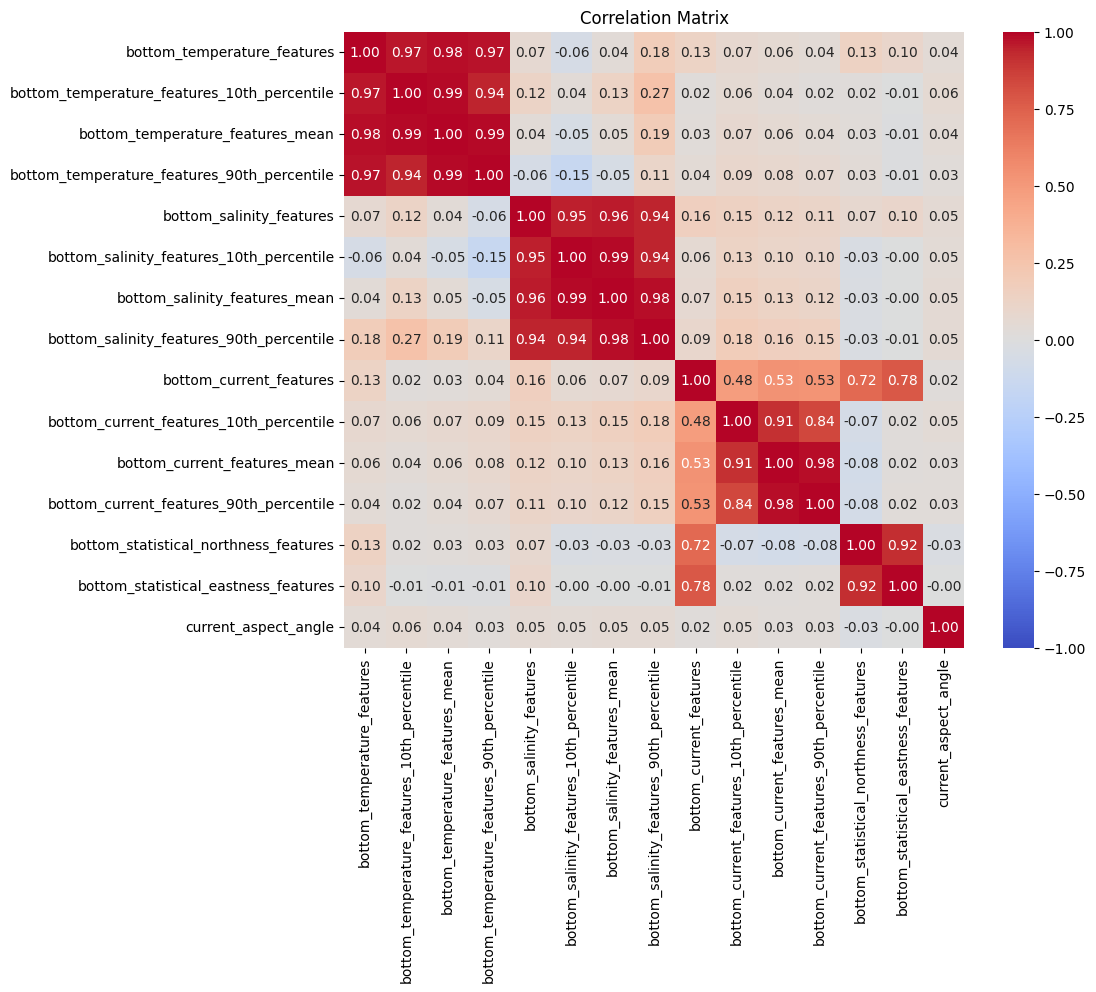

'\ncorr_matrix = df.corr()\n\n# Reorder Rows and Columns to Match DataFrame Column Order\nordered_corr = corr_matrix.loc[df.columns, df.columns]\nprint(ordered_corr)\n'

In [14]:
#Creating the correlation matrix for all locations

correlation_matrix = env_df.corr()

ordered_corr = correlation_matrix.loc[env_df.columns, env_df.columns]

plt.figure(figsize=(10, 8))
sns.heatmap(ordered_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [7]:
env_df_final = env_df.drop(columns=['bottom_temperature_features', 'bottom_salinity_features', 'bottom_current_features'])

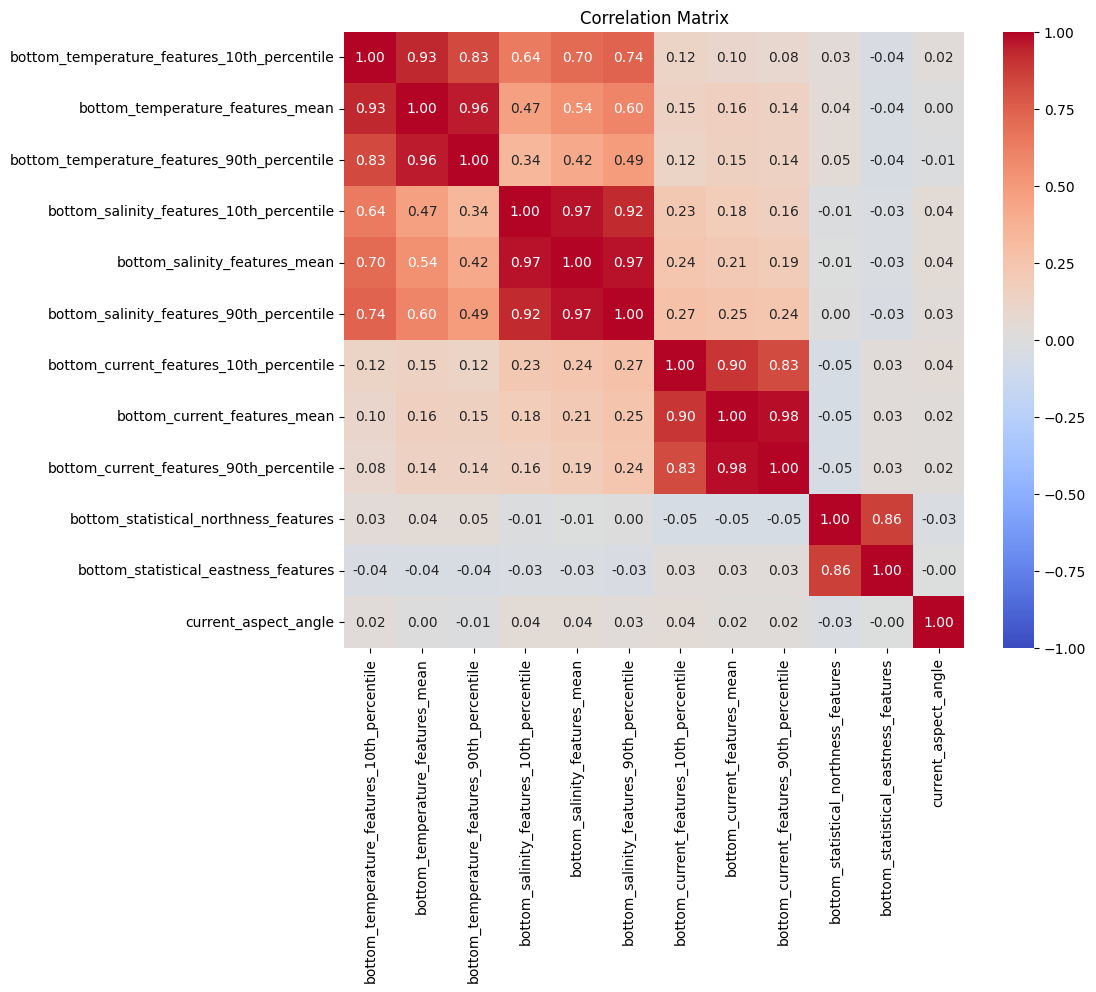

In [23]:
correlation_matrix_final = env_df_final.corr(method='spearman')
ordered_corr_final = correlation_matrix_final.loc[env_df_final.columns, env_df_final.columns]

plt.figure(figsize=(10, 8))
sns.heatmap(ordered_corr_final, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [8]:
emod_filepath = "/cluster/projects/itk-SINMOD/coral-mapping/data/processed_data/features/ready-for-training/EMOD_features.nc"
emod_data = xr.open_dataset(emod_filepath)

In [10]:
print(list(emod_data.variables)) #9

['x', 'y', 'aspect_cos_clipped', 'aspect_sin_clipped', 'bathymetry_32N_Clip_sample_clipped', 'broad_BPI_std_clipped', 'fine_BPI_std_clipped', 'log_ruggedness_1_clipped', 'slope_clipped']


In [9]:
emod_df = emod_data.to_dataframe().reset_index()

In [10]:
print(len(env_df_final['x']))
print(len(emod_data['x']))

100128072
8325


In [12]:
print(emod_df.columns)

Index(['x', 'y', 'aspect_cos_clipped', 'aspect_sin_clipped',
       'bathymetry_32N_Clip_sample_clipped', 'broad_BPI_std_clipped',
       'fine_BPI_std_clipped', 'log_ruggedness_1_clipped', 'slope_clipped'],
      dtype='object')


In [29]:
emod_df_no_xy = emod_df.drop(columns=['x', 'y'])
print(emod_df_no_xy.columns)

Index(['aspect_cos_clipped', 'aspect_sin_clipped',
       'bathymetry_32N_Clip_sample_clipped', 'broad_BPI_std_clipped',
       'fine_BPI_std_clipped', 'log_ruggedness_1_clipped', 'slope_clipped'],
      dtype='object')


In [30]:
scaler = StandardScaler()
features_to_scale = [
    'aspect_cos_clipped',
    'aspect_sin_clipped',
    'bathymetry_32N_Clip_sample_clipped',
    'broad_BPI_std_clipped',
    'fine_BPI_std_clipped', 
    'log_ruggedness_1_clipped', 
    'slope_clipped'
]
scaled_emod_data = scaler.fit_transform(emod_df_no_xy[features_to_scale])
emod_df_no_xy[features_to_scale] = scaled_emod_data

print(emod_df_no_xy.head())


   aspect_cos_clipped  aspect_sin_clipped  bathymetry_32N_Clip_sample_clipped  \
0                 NaN                 NaN                                 NaN   
1                 NaN                 NaN                                 NaN   
2                 NaN                 NaN                                 NaN   
3                 NaN                 NaN                                 NaN   
4                 NaN                 NaN                                 NaN   

   broad_BPI_std_clipped  fine_BPI_std_clipped  log_ruggedness_1_clipped  \
0                    NaN                   NaN                       NaN   
1                    NaN                   NaN                       NaN   
2                    NaN                   NaN                       NaN   
3                    NaN                   NaN                       NaN   
4                    NaN                   NaN                       NaN   

   slope_clipped  
0            NaN  
1            NaN  

In [31]:
emod_df = emod_df_no_xy.dropna()
print(emod_df.head())

       aspect_cos_clipped  aspect_sin_clipped  \
6527             1.097884           -0.011452   
16196            1.112001            0.463220   
16197            1.121325            0.369162   
16198            1.124491            0.292340   
16199            1.124547            0.250715   

       bathymetry_32N_Clip_sample_clipped  broad_BPI_std_clipped  \
6527                            -1.584560               0.097293   
16196                           -1.586389               0.097293   
16197                           -1.585431               0.097293   
16198                           -1.584451               0.097293   
16199                           -1.583484               0.097293   

       fine_BPI_std_clipped  log_ruggedness_1_clipped  slope_clipped  
6527              -0.032979                  2.300712      -0.338572  
16196             -0.032979                 -1.015276      -0.333801  
16197             -0.032979                 -0.966753      -0.332131  
16198       

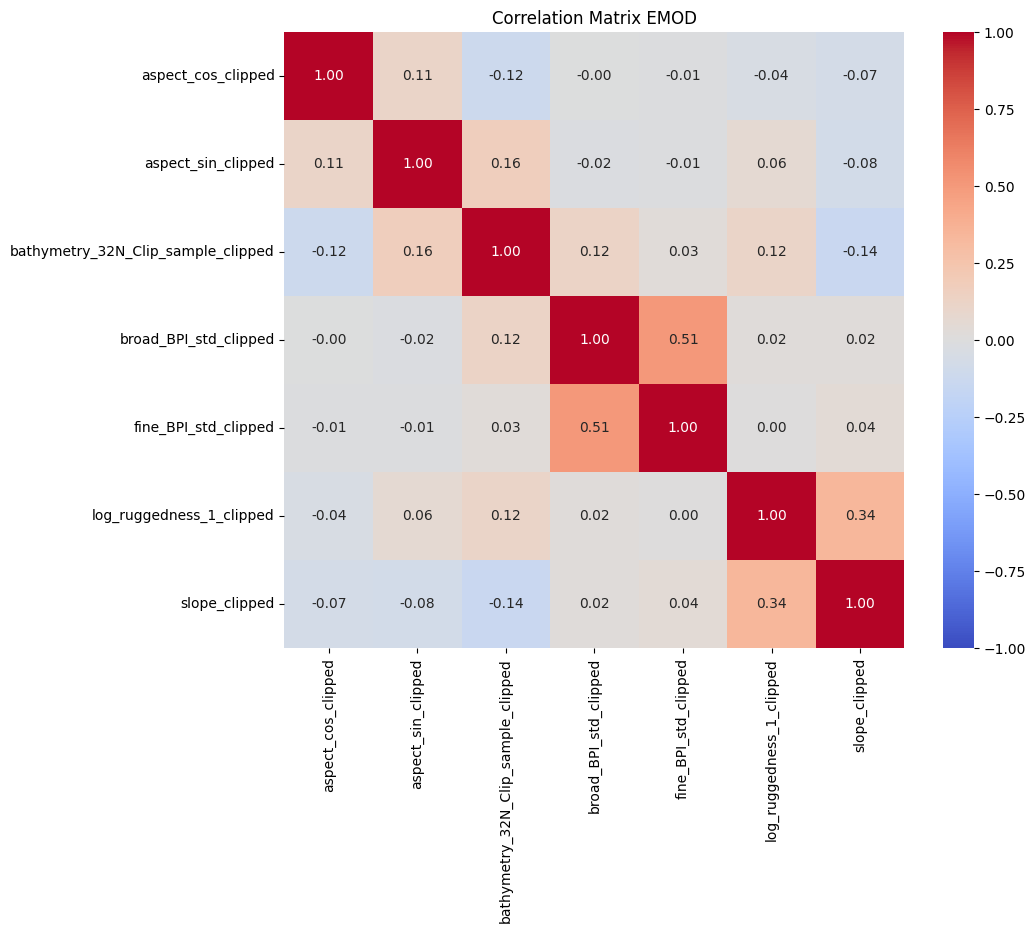

In [16]:
correlation_matrix_emod = emod_df.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_emod, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix EMOD")
plt.show()

In [17]:
df_combined = pd.concat([emod_df, env_df_final], axis=1)
print(df_combined.columns)

Index(['aspect_cos_clipped', 'aspect_sin_clipped',
       'bathymetry_32N_Clip_sample_clipped', 'broad_BPI_std_clipped',
       'fine_BPI_std_clipped', 'log_ruggedness_1_clipped', 'slope_clipped',
       'bottom_temperature_features_10th_percentile',
       'bottom_temperature_features_mean',
       'bottom_temperature_features_90th_percentile',
       'bottom_salinity_features_10th_percentile',
       'bottom_salinity_features_mean',
       'bottom_salinity_features_90th_percentile',
       'bottom_current_features_10th_percentile',
       'bottom_current_features_mean',
       'bottom_current_features_90th_percentile',
       'bottom_statistical_northness_features',
       'bottom_statistical_eastness_features', 'current_aspect_angle'],
      dtype='object')


In [18]:
df_combined.to_parquet('/cluster/home/maikents/coral-mapping/processed_data/df_combined_emod_sinmod.parquet')


In [19]:
combined_filepath = '/cluster/home/maikents/coral-mapping/processed_data/df_combined_emod_sinmod.parquet'
df_combined = pd.read_parquet(combined_filepath)

In [20]:
import seaborn as sns

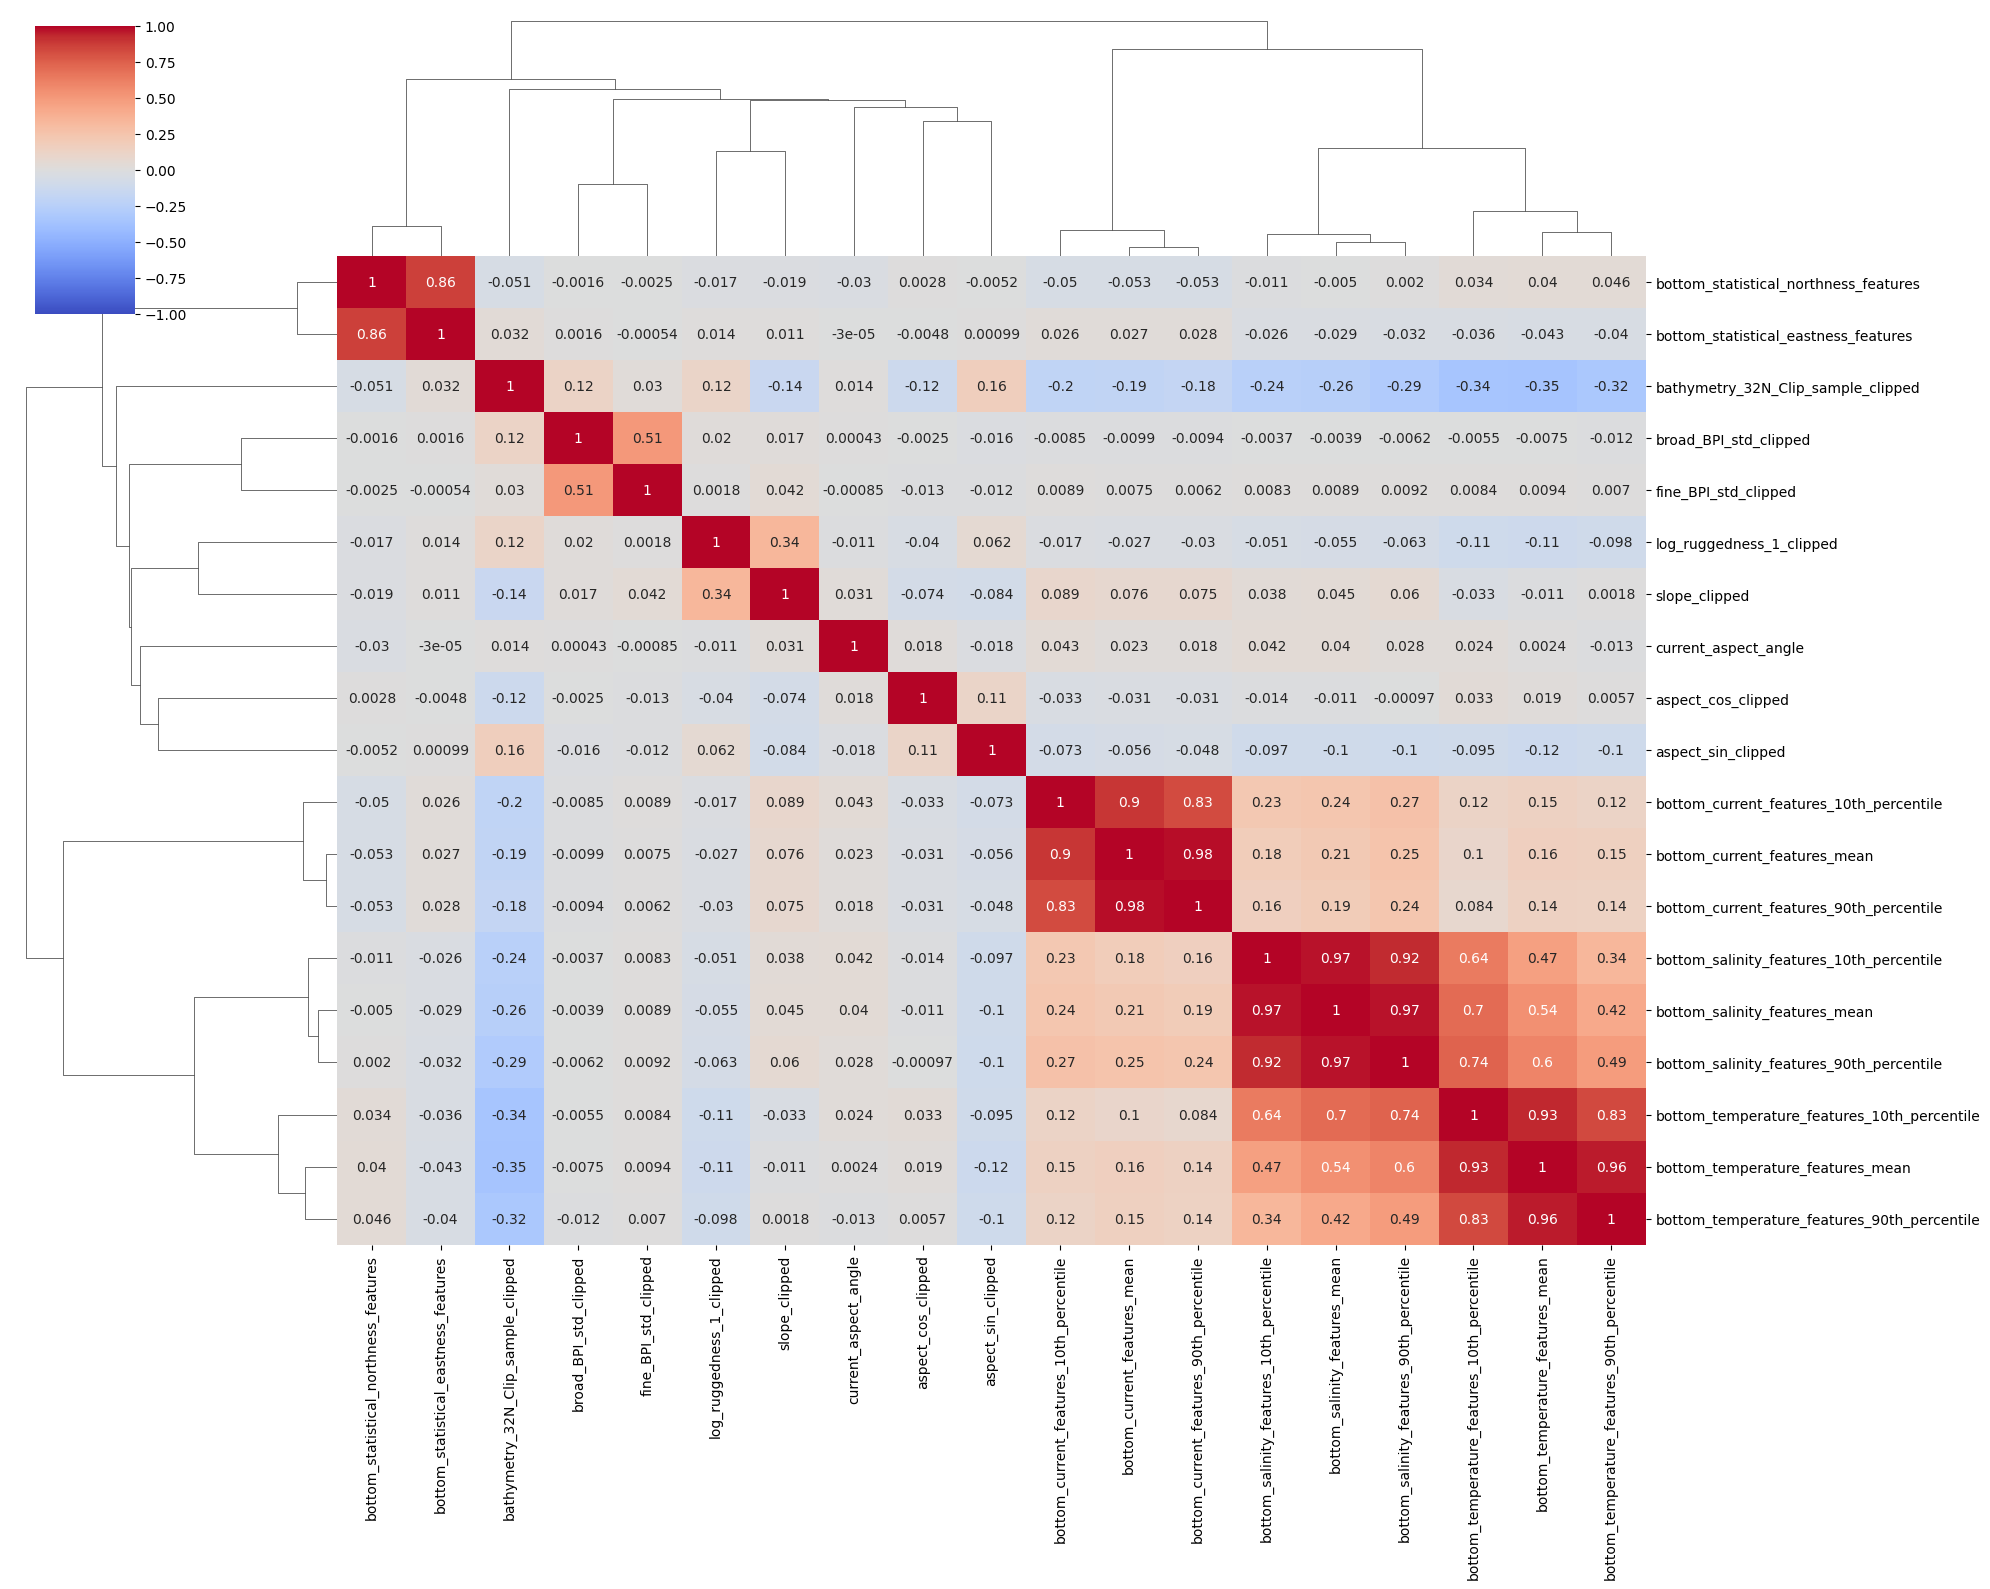

In [22]:


# Compute Correlation Matrix
corr_matrix_combined = df_combined.corr(method='spearman')

# Clustered Heatmap
sns.clustermap(corr_matrix_combined, cmap='coolwarm', annot=True, figsize=(20, 16), vmin=-1, vmax=1)
plt.show()

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

dissimilarity = 1 - abs(corr_matrix_combined)

Z = linkage(squareform(dissimilarity), 'complete')

In [24]:
# Clusterize the data
threshold = 0.4
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels


array([ 3,  4, 12,  7,  8,  1,  2, 11, 11, 11, 10, 10, 10,  9,  9,  9,  6,
        6,  5], dtype=int32)

In [25]:
# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(df_combined.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(df_combined[i])
    else:
        df_to_append = pd.DataFrame(df_combined[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

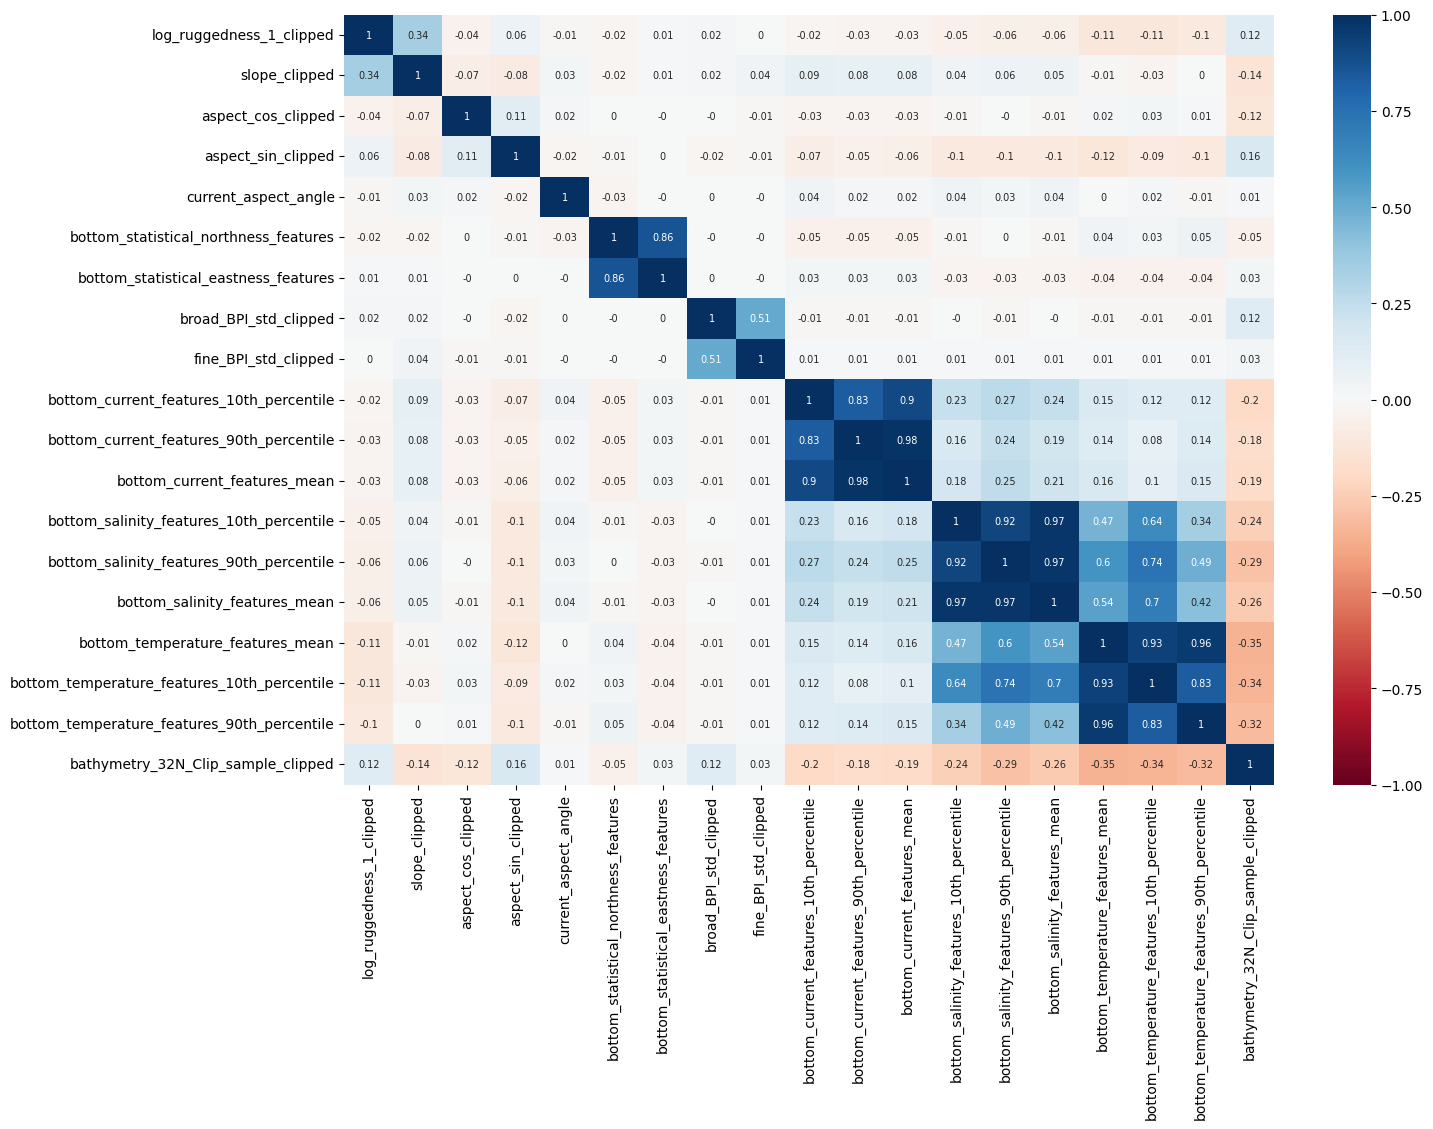

In [26]:
plt.figure(figsize=(15,10))
correlations = clustered.corr(method='spearman')
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);


In [40]:
#env_df = env_df_no_xy.drop(columns=['bottom_statistical_northness_features_mean','bottom_statistical_eastness_features_mean'])
#print(env_df.columns)
env_df_pca = env_df.drop(columns=['bottom_temperature_features','stat_mean', 'spatial_ref_mean', 'bottom_temperature_features_mean', 'bottom_temperature_features_90th_percentile',
'bottom_salinity_features_10th_percentile', 'bottom_salinity_features','bottom_salinity_features_90th_percentile','bottom_current_features',  'bottom_current_features_10th_percentile', 'bottom_current_features_90th_percentile' ])

print(env_df_pca.columns)

Index(['bottom_statistical_northness_features',
       'bottom_statistical_eastness_features', 'current_aspect_angle',
       'bottom_salinity_features_mean', 'bottom_current_features_mean',
       'bottom_temperature_features_10th_percentile'],
      dtype='object')


In [41]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(env_df_pca)

In [42]:
for i in range(pca.n_components_):
    print(f"Principal Component {i + 1}: {pca.explained_variance_ratio_[i] * 100:.2f}%")
    for col_name in env_df_pca.columns:
        print(f"{col_name}: {pca.components_[i][env_df_pca.columns.get_loc(col_name)]}")

    print("\n")

Principal Component 1: 35.22%
bottom_statistical_northness_features: 0.7051446920133385
bottom_statistical_eastness_features: 0.707346212957688
current_aspect_angle: -0.023527317631789522
bottom_salinity_features_mean: -0.016038284089512807
bottom_current_features_mean: -0.03983465797213839
bottom_temperature_features_10th_percentile: 0.005893821560777006


Principal Component 2: 20.12%
bottom_statistical_northness_features: 0.002832306037174421
bottom_statistical_eastness_features: 0.03255747889760775
current_aspect_angle: 0.5570434656190668
bottom_salinity_features_mean: 0.21310216605258916
bottom_current_features_mean: 0.3221298267165556
bottom_temperature_features_10th_percentile: 0.7344756004011972


Principal Component 3: 17.38%
bottom_statistical_northness_features: -0.005223128379733293
bottom_statistical_eastness_features: 0.03229195904985877
current_aspect_angle: 0.8136647203292566
bottom_salinity_features_mean: -0.07452453929038422
bottom_current_features_mean: -0.0543979111

In [46]:
for i in range(pca.n_components_):
    print(f"Principal Component {i + 1}: {pca.explained_variance_ratio_[i] * 100:.2f}%")
    for col_name in env_data_df_no_nan_no_xy.columns:
        print(f"{col_name}: {pca.components_[i][env_data_df_no_nan_no_xy.columns.get_loc(col_name)]}")

    print("\n")

Principal Component 1: 31.18%
bottom_temperature_features: 0.47564823849410365
bottom_salinity_features: 0.06746479259135296
bottom_current_features: 0.14330798523934446
bottom_statistical_northness_features: 0.07926297455758402
bottom_statistical_eastness_features: 0.07586724101536117
current_aspect_angle: 0.03458921551330431
bottom_temperature_features_mean: 0.4741580443977426
bottom_salinity_features_mean: 0.06240905923831352
bottom_current_features_mean: 0.14158640732680686
bottom_temperature_features_10th_percentile: 0.47243484353045573
bottom_salinity_features_10th_percentile: 0.026264689603947133
bottom_current_features_10th_percentile: 0.1440639914212919
bottom_temperature_features_90th_percentile: 0.45848745439613237
bottom_salinity_features_90th_percentile: 0.12052779772684331
bottom_current_features_90th_percentile: 0.1314956571475303


Principal Component 2: 24.13%
bottom_temperature_features: -0.13978000809921118
bottom_salinity_features: 0.14014671923477084
bottom_current

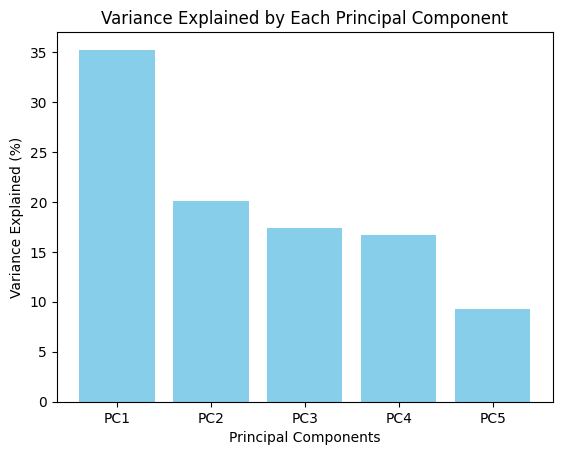

In [43]:
pca_variance = [35.22, 20.12, 17.38, 16.65, 9.27]
components = [f'PC{i+1}' for i in range(len(pca_variance))]

plt.bar(components, pca_variance, color='skyblue')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained (%)')
plt.title('Variance Explained by Each Principal Component')
plt.show()

In [49]:
# Create a dataframe to hold the feature contributions for each PC
pca_contributions = {
    'Feature': [
        'bottom_temperature_features', 'bottom_salinity_features', 'bottom_current_features', 
        'bottom_statistical_northness_features', 'bottom_statistical_eastness_features', 
        'current_aspect_angle', 'bottom_temperature_features_mean', 'bottom_salinity_features_mean', 
        'bottom_current_features_mean', 'bottom_temperature_features_10th_percentile', 
        'bottom_salinity_features_10th_percentile', 'bottom_current_features_10th_percentile', 
        'bottom_temperature_features_90th_percentile', 'bottom_salinity_features_90th_percentile', 
        'bottom_current_features_90th_percentile'
    ],
    'PC1': [
        0.47564823849410365, 0.06746479259135296, 0.14330798523934446, 0.07926297455758402, 
        0.07586724101536117, 0.03458921551330431, 0.4741580443977426, 0.06240905923831352, 
        0.14158640732680686, 0.47243484353045573, 0.026264689603947133, 0.1440639914212919, 
        0.45848745439613237, 0.12052779772684331, 0.1314956571475303
    ],
    'PC2': [
        -0.13978000809921118, 0.14014671923477084, 0.44762168695549137, 0.2071767700857354, 
        0.26623668670684997, 0.01467545016967294, -0.17395074554765558, 0.12262302789388693, 
        0.42308941751715234, -0.17188034314698877, 0.12730685497917194, 0.39955032709480093, 
        -0.16970080801799947, 0.11449327080856142, 0.4181367797870929
    ],
    'PC3': [
        0.058810531596034166, -0.14268192189900603, 0.3018071319798043, 0.5600794480599997,
        0.5356502821192408, -0.04279600546084602, -0.0037019604125224136, -0.19132687431330977,
        -0.24211575490890505, -0.01958631635064407, -0.18507473705478714, -0.24116034023516844,
        0.014079499097829878, -0.19893172514698415, -0.23419556612789766
    ],
    'PC4': [
        -0.010055279980216578, 0.4435568791243587, -0.022407460222621692, 0.14981110659580443,
        0.1353253159014264, 0.03389670130841752, -0.02533774838863631, 0.44208562466623186,
        -0.24993622625643558, 0.03738755577254186, 0.4393973576189064, -0.21558406959004645,
        -0.09526015360065605, 0.43688517556056405, -0.24761152421787208
    ],
    'PC5': [
        -0.011132871596998719, -0.02604972361535868, 0.008281236600572228, -0.00366575759148343,
        0.02357417129810407, 0.997339979812595, -0.012259619087654017, -0.027896423794296025,
        -0.018856450092449153, -0.005290324219792487, -0.024611553964167723, -0.0035753962764430575,
        -0.02087177079382122, -0.03287935036335043, -0.020625736875527243
    ]
}

df_contributions = pd.DataFrame(pca_contributions)
print(df_contributions)

                                        Feature       PC1       PC2       PC3  \
0                   bottom_temperature_features  0.475648 -0.139780  0.058811   
1                      bottom_salinity_features  0.067465  0.140147 -0.142682   
2                       bottom_current_features  0.143308  0.447622  0.301807   
3         bottom_statistical_northness_features  0.079263  0.207177  0.560079   
4          bottom_statistical_eastness_features  0.075867  0.266237  0.535650   
5                          current_aspect_angle  0.034589  0.014675 -0.042796   
6              bottom_temperature_features_mean  0.474158 -0.173951 -0.003702   
7                 bottom_salinity_features_mean  0.062409  0.122623 -0.191327   
8                  bottom_current_features_mean  0.141586  0.423089 -0.242116   
9   bottom_temperature_features_10th_percentile  0.472435 -0.171880 -0.019586   
10     bottom_salinity_features_10th_percentile  0.026265  0.127307 -0.185075   
11      bottom_current_featu

<Figure size 1200x800 with 0 Axes>

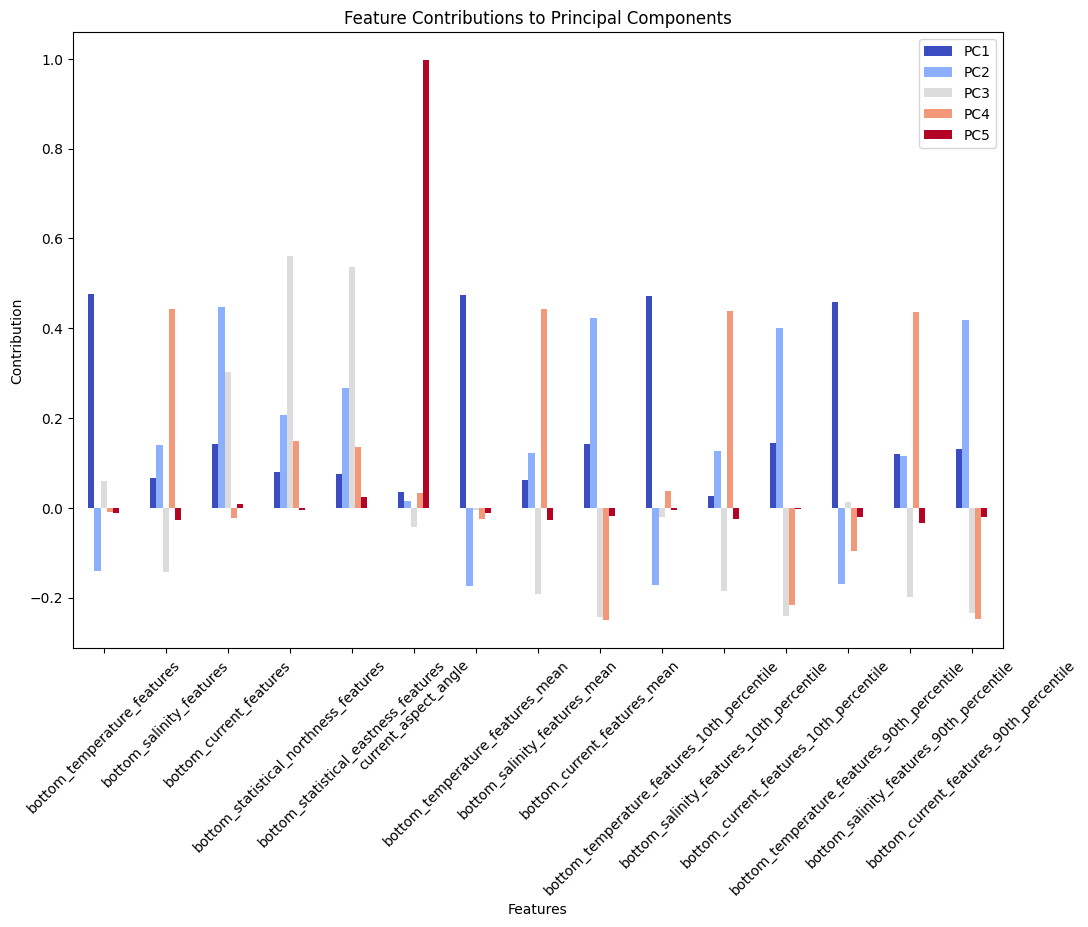

In [50]:
plt.figure(figsize=(12, 8))
df_contributions.set_index('Feature').plot(kind='bar', figsize=(12, 8), cmap='coolwarm')
plt.title('Feature Contributions to Principal Components')
plt.ylabel('Contribution')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [71]:
coral_df = pd.read_parquet("/cluster/home/maikents/midnor_total_coral_data_processed.parquet")
print(coral_df.head())


                                   gml_id  \
0  idcc1ddf21-7f6f-42ae-9de0-c1beae782900   
1  ide9bd1ddb-8384-48c4-a649-ba9597853be3   
2  id8cddeeb9-2353-4795-9161-4e01397a3a21   
3  idaa31e030-a287-4319-8dfc-183c2a169279   
4  id98f7a0c4-4c26-4288-a04d-0434cf8221c6   

                                lokalId  \
0  d8ba3d54-6e03-42dd-b77a-32b929c5db0f   
1  99f8ae65-8129-4d2f-a2e0-f6cdf8e08035   
2  4745cb87-fe72-4616-ac28-addecc91dfae   
3  ecaa4561-58ea-48ea-80d3-04f843dd7a46   
4  0a7f0f6c-01f2-494d-802d-3505caddf8f6   

                                            navnerom    verifiseringsdato  \
0  https://data.geonorge.no/sosi/biomangfold/kora...  2013-11-10T23:00:00   
1  https://data.geonorge.no/sosi/biomangfold/kora...  2011-01-16T23:00:00   
2  https://data.geonorge.no/sosi/biomangfold/kora...  2018-03-12T23:00:00   
3  https://data.geonorge.no/sosi/biomangfold/kora...  2018-03-12T23:00:00   
4  https://data.geonorge.no/sosi/biomangfold/kora...  2018-03-12T23:00:00   

     pr

In [ ]:
#Combining coral locations and environmntal data, to get env_data_df_no_nan with an extra
#columns containing 1 for presence, 0 for absence/background

In [72]:
from sklearn.neighbors import NearestNeighbors

In [83]:
nn = NearestNeighbors(n_neighbors=1)
nn.fit(coral_df[['x', 'y']])

# Find nearest coral points for each environmental data point
distances, indices = nn.kneighbors(env_data_df_no_nan[['x', 'y']])


In [84]:
# Define a distance threshold for determining coral presence
distance_threshold = 800  # Adjust based on your data's resolution

# Add coral presence column based on the threshold
env_data_df_no_nan['coral_presence'] = (distances.flatten() <= distance_threshold).astype(int)


In [ ]:
matches = 0

for i in range(len(coral_df['x'])):
    # Loop through each environmental x-coordinate to check if it's within +-800 of coral x-coordinate
    for env_x in env_xes:
        if abs(coral_df['x'][i] - env_x) <= 800:  # Check if the difference is within +-800 meters
            matches += 1  # Increment counter when a match is found
            # Exit the loop once a match is found (no need to check further)

print(matches) 

In [90]:
print(env_data_df_no_nan['x'].min())
print(env_data_df_no_nan['x'].max())
print(coral_df['x'].min())
print(coral_df['x'].max())

-65456.088686234725
691026.9113137652
18334.953319572378
893776.8785220876


In [91]:
print(env_data_df_no_nan['y'].min())
print(env_data_df_no_nan['y'].max())
print(coral_df['y'].min())
print(coral_df['y'].max())

6659218.347672726
7539097.347672726
-31935.75522181671
361915.8423262872


In [92]:
env_filepath_nan = '/cluster/home/maikents/coral-mapping/processed_data/env_df_with_nan.parquet'
env_df_nan = pd.read_parquet(env_filepath_nan)

In [93]:
print(env_df_nan['x'].min())
print(env_df_nan['x'].max())
print(coral_df['x'].min())
print(coral_df['x'].max())


-65456.088686234725
692027.9113137652
18334.953319572378
893776.8785220876
